In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm 

In [2]:
u0=lambda x,t: 0.0

In [3]:
dt=0.1 
L=1000.
L0=0.0
Tmax=2000.
Dt=200
dx=0.5
T0=0.0 

Psi=1


def Init_cond(x):

  if x>=400. and x<600.:
    return (np.sin((x-400.)/200*np.pi))**2
  else:
    return 0.0
  

In [4]:
X=np.arange(0.0,L+dx,dx)

In [5]:
phi_0=np.array(list(map(Init_cond,X)))
phi_prev_ctcs=np.copy(phi_0)
phi_prev_ftcs=np.copy(phi_0)

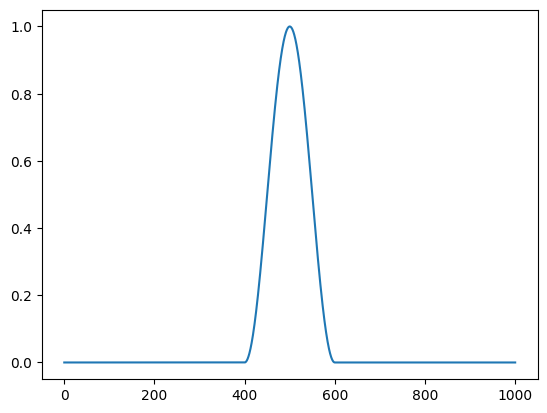

In [6]:
plt.plot(X,phi_0)

# Initialize U

In [7]:
u_prev_ftcs=np.zeros_like(X)
u_prev_ctcs=np.zeros_like(X)

#Function for U update

In [8]:
c=np.sqrt(Psi*(dt**2/dx**2))

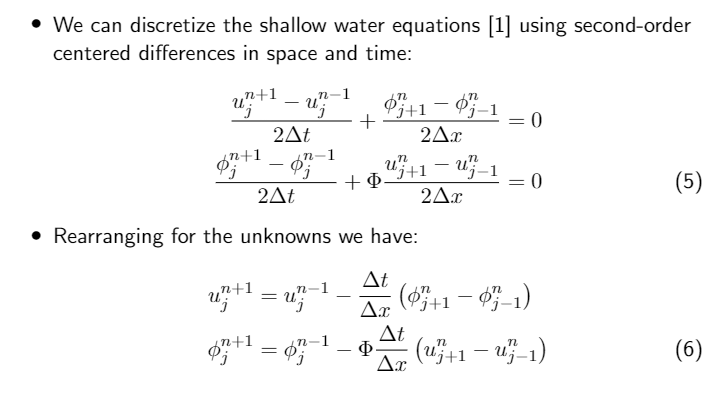

In [9]:
def Phi_U_update_CTCS(phi,phi_old,u_old,u,c):
 
 
  
  u_ctcs=u_old-c*(np.roll(phi,-1)-np.roll(phi,1))

  phi_ctcs=phi_old-c*(np.roll(u,-1)-np.roll(u,1))

  
  return phi_ctcs, u_ctcs

#phi[j+1]-phi[j-1]

# Function for $\phi$ update

In [10]:
def Phi_U_update_FTCS(phi,u,c):
  phi_ftcs=phi[:]
  

  u_ftcs=u-0.5*c*(np.roll(phi,-1)-np.roll(phi,1))

  phi_ftcs[:]=phi-0.5*c*(np.roll(u_ftcs,-1)-np.roll(u_ftcs,1))
  return phi_ftcs,u_ftcs


def mod(n,r):
  return n%r

# Looping in time to update Phi and U 

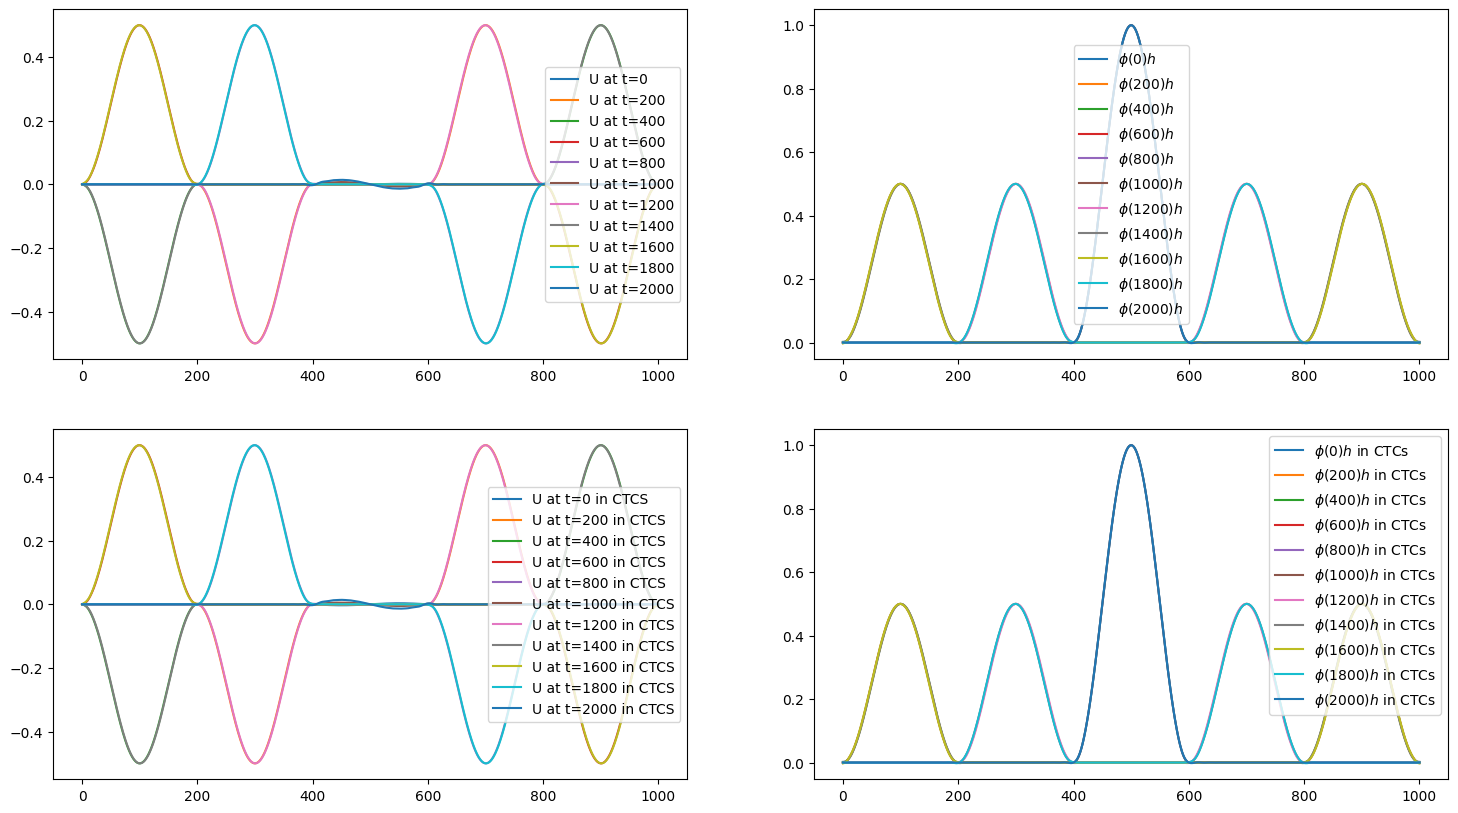

In [11]:
t=0.0
plt.figure(figsize=(18,10))

u_old_ctcs=np.copy(u_prev_ctcs)
phi_old_ctcs=np.copy(phi_prev_ctcs)

while t<Tmax+dt:
  
  
  
  phi_ctcs_new, u_ctcs_new =Phi_U_update_CTCS(phi_prev_ctcs, phi_old_ctcs, u_old_ctcs, u_prev_ctcs, c)

  phi_ftcs_new, u_ftcs_new =Phi_U_update_FTCS(phi_prev_ftcs,u_prev_ftcs, c)


  # i=0
  if mod(t,Dt)<dt:

    #Plotting forward difference

    plt.subplot(2,2,1)
    plt.plot(X,u_ftcs_new,label=r'U at t=%s'%int(t))
    # while i<len(X)-10:
    #   plt.quiver(X[i],0.1+u_ftcs_new[i],X[i+1]-X[i],u_ftcs_new[i+1]-u_ftcs_new[i],color='k')
    #   i+=10
    plt.legend()
    plt.subplot(2,2,2)
    plt.plot(X,phi_ftcs_new,label=r'$\phi(%s)h$'%int(t))
    plt.legend()

    #Plotting central difference

    plt.subplot(2,2,3)
    plt.plot(X,u_ctcs_new,label=r'U at t=%s in CTCS'%int(t))
    plt.legend()

    plt.subplot(2,2,4)
    plt.plot(X,phi_ctcs_new,label=r'$\phi(%s)h$ in CTCs'%int(t))
    plt.legend(loc='upper right')

  #Keep Previous unupdated values of u and phi for CTCS
  u_old_ctcs[:] = u_prev_ctcs[:]
  phi_old_ctcs[:]=phi_prev_ctcs[:]

  #Update for forward  U
  u_prev_ftcs[:]=u_ftcs_new[:]
  u_prev_ctcs[:]=u_ctcs_new[:]

  #Update On phi in Forward
  phi_prev_ftcs[:]=phi_ftcs_new[:]
 
  # Update central finite difference on phi
  phi_prev_ctcs[:]=phi_ctcs_new[:]
  t = t + dt

plt.show()


